In [2]:
from library_functions.imports_explainer_notebook import *

# Text Analysis: Wordclouds, Sentiments, and More

We already touched on text analysis when preparing our data - now is time to revisit our pages and post, and see what more we can extract from them. While this was one of the more exciting parts of the assignment from a practical perspective (as in, we were able to get a lot of insights on our dataset using text analysis), the techniques we use are very similar to what we did during the year. 

With that in mind, we will keep this section rather brief in this notebook - and you are encouraged to explore our results on the website instead.

## Wordcloud generation and comparison

Similar to what we did during the semester, we generated wordclouds based on the TF-IDFs of both pages and posts. In the case of posts, we aggregated all posts about every given nootropic, and used that as "documents". 


First off, we need to load our graphs - except this time, when generating reddit's graph, we includs as node attribute the text of all posts that mention that node, and as link attribute the text of all posts that mention both nodes.

**Note**: We do it here for the wordclouds based on Reddit data. The process is entirely equivalent for WikiPedia.


In [28]:
graph_reddit = lf.create_graph_reddit(
    max_drugs_in_post=6,  # Ignore posts that have too many substances in them, as they are likely noise
    min_edge_occurrences_to_link=2,  # Include all mentions
    include_link_contents=True, # Also load the text of all posts that mention every node
    include_node_contents=True, # Same for links
    min_content_length_in_characters=25, # Ignore very short posts that are mostly noise
)
graph_reddit = w.graph.largest_connected_component(graph_reddit)


Then, we use spacy to generate a list of lemmas associated with each node. The commented code can be found in `library_functions/text_analysis.py`:

In [29]:
lf.assign_lemmas(graph_reddit)

100%|██████████| 347/347 [00:52<00:00,  6.61it/s]


From there, we can compute term frequencies and inverse document frequencies. Again, the functions are in `library_functions/text_analysis.py` - and make use of the same functions to calculate TF/IDFs which we implemented during the year:

In [30]:
lf.assign_tfs(graph_reddit)
lf.assign_idfs(graph_reddit)

100%|██████████| 347/347 [02:42<00:00,  2.13it/s]


With this done, we can calculate TF-IDFS for each node - which is simply a matter of multiplying the two previous values:

In [31]:
lf.assign_tf_idfs(graph_reddit)

100%|██████████| 347/347 [00:03<00:00, 102.97it/s]


Which then lets us generate nice wordclouds of an arbitrary substance. As an added bonus, we can pass it a function that makes the wordclouds use a specific color palette:

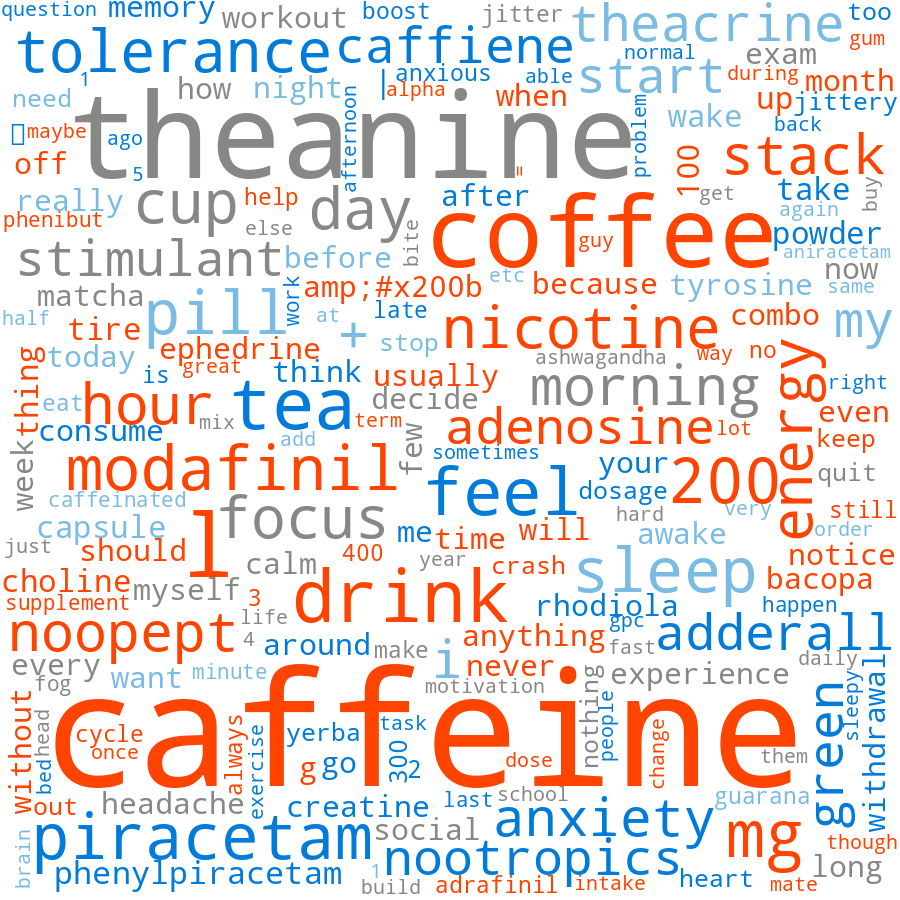

In [32]:
import random
def color_func_reddit(word, **kwargs):
    # Return a random color from reddit's palette. 
    colors = ["#ff4401", "#ff4401", "#007bd9", "#007bd9", "#79bbe3", "#878785"]
    return random.choice(colors)
wc= lf.wordcloud_from_node(graph_reddit, "caffeine", color_func=color_func_reddit)
wc.to_image()

Similarly, we also implemented functions that allow generating wordclouds from either a collection of nodes, or from a link. 

Note that the amount of links is enormous, so we can't pre-compute TFs and IDFs - in this case, they are computed on the fly, which takes much longer. 
Also note that to speed things up, in this case, the *terms* are the terms that occur in all posts that mention both substances, but the the *documents* used to compute IDFs are the same "documents" as before - that is, there is one document per node (substance), and each documents contains all the terms that appear in all posts about the corresponding substance.

This is not strictly correct - here, there should be one *document* per link between two substances, and each document should thus set of terms that occur in posts that contain both substances in the link. However, using the same documents as above should still give a reasonably good approximation, and is several orders of magnitude faster.

Here is an example of a wordcloud for the links between *Caffeine* and *Theanine*:


In [39]:
wc= lf.wordcloud_from_link(graph_reddit, "caffeine", "theanine",color_func=color_func_reddit )
wc.to_image()

TypeError: wordcloud_from_link() got an unexpected keyword argument 'color_func'

The code and idea behind community and link wordclouds is almost identical to the ones based on nodes - so we will not repeat them. For a showcase, playground, and discussion of our results, please see our website [TODO- insert link]

## Sentiment analysis - Wojciech

dict_keys(['categories', 'content', 'url', 'lemmas', 'tfs'])